# Homework - 4
***
**Name**: Christina Cleveland

Worked with Maggie Jacoby, consulted http://mlss.tuebingen.mpg.de/2015/slides/gretton/part_1.pdf for Q1, part 1
***

This assignment is due on Canvas by **5pm on Friday November 16th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Kernels [5 - points]

**Q:** We have seen two different definitions of kernels during the course:
* Definition 1: $K(x, x^{\prime})$ is a kernel if it can be written as an inner product $\phi(x)^T\phi(x^{\prime})$ for some feature mapping $x \rightarrow \phi(x)$.
* Definition 2: $K(x, x^{\prime})$ is a kernel if for any finite set of training examples $x_1, \cdots, x_n$, the $n \times n$ matrix __K__ such that $K_{ij} = K(x_i, x_j)$ is positive semidefinite

Show that definition 1 implies definition 2.

_Hint:_ you could show this by proving that for real numbers $\alpha_1, \cdots, \alpha_n$ and points $x_1, \cdots, x_n$,
$$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) \geq 0$$
if the kernel can be written as $K(x, x^{\prime}) = \phi(x)^T\phi(x^{\prime})$

Solution:


$$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) = \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j\big<\phi(x_i), \phi(x_j)\big>$$

$$\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j\big<\phi(x_i), \phi(x_j)\big> = \bigg<\sum_{i=1}^n \alpha_i\phi(x_i), \sum_{j=1}^n \alpha_j\phi(x_j)\bigg>$$

$$\bigg<\sum_{i=1}^n \alpha_i\phi(x_i), \sum_{j=1}^n \alpha_j\phi(x_j)\bigg> = ||\sum_{i=1}^n\alpha_i\phi(x_i)||^2$$

So, it follows that $$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j)  = ||\sum_{i=1}^n\alpha_i\phi(x_i)||^2 \geq 0 $$

**Q:** One way to construct kernels is to build them from simpler ones. We have already seen three possible "composition rules": assuming $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$ are kernels, then the following are also kernels:
* (scaling) $f(x)K_1(x, x^\prime)f(x^\prime), \ f(x) \in \mathbb R$
* (sum) $K_1(x, x^\prime) + K_2(x, x^\prime)$
* (product) $K_1(x, x^\prime)K_2(x, x^\prime)$

(a) Let $\phi^{(1)}(x)$ and $\phi^{(2)}(x)$ be the feature vectors corresponding to kernels $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$, respectively. These feature vectors may be of different length. Show that the product $K_1(x, x^\prime)K_2(x, x^\prime)$ is a kernel by showing that its feature vectors are given by $\phi(x)$ whose $(i, j)^{th}$ component (double indexed vector) is $\phi_i^{(1)}(x)\phi_j^{(2)}(x)$.

(b) Use the composition rules to build a normalized cubic polynomial kernel defined as:
$$K(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

You can assume that you already have a constant kernel $K_0(x, x^\prime) = 1$ and a linear kernel $K_1(x, x^\prime) = x^Tx^\prime$. Identify which rules you are employing at each step.

(a)

$$K_1(x, x^\prime)K_2(x, x^\prime) = \phi^{(1)}(x)^T\phi^{(1)}(x^\prime) \phi^{(2)}(x)^T\phi^{(2)}(x^\prime)$$

$$K_1(x, x^\prime)K_2(x, x^\prime) = \bigg(\sum_{i=1}^n \phi^{(1)}_i(x)\phi^{(1)}_i(x^\prime)\bigg)\bigg(\sum_{j=1}^m \phi^{(2)}_j(x)\phi^{(2)}_j(x^\prime)\bigg)$$

$$K_1(x, x^\prime)K_2(x, x^\prime) = \sum_{i=1}^n \sum_{j=1}^m \big(\phi^{(1)}_i(x)\phi^{(2)}_j(x)\big)\big(\phi^{(1)}_i(x^\prime)\phi^{(2)}_j(x^\prime)\big)$$

Based on the given definition of $\phi(x)$ we can substitute $\phi(x)$ into the equation above. We get:


$$K_1(x, x^\prime)K_2(x, x^\prime) = \phi(x)^T\phi(x^\prime)$$

Therefore the product $K_1(x, x^\prime)K_2(x, x^\prime)$ is a kernel with the feature vector $\phi(x)$ as defined above. 

(b) 


let $f(x) = \frac{1}{||x||}$

$$K_2(x, x^\prime) = \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg) =  \frac{1}{||x||}x^Tx^\prime \frac{1}{||x^\prime||}$$

$$K_2(x, x^\prime) = f(x)K_1(x, x^\prime) f(x^\prime)$$

Therefore $K_2(x, x^\prime)$ is a valid kernel by the scaling rule.

$$K_3(x, x^\prime) = 1 + K_2(x, x^\prime) = K_0(x, x^\prime) + K_2(x, x^\prime)$$

Therefore $K_3(x, x^\prime)$ is a valid kernel by the sum rule.

$$K_4(x, x^\prime) = K_3(x, x^\prime)K_3(x, x^\prime)$$

$$K_5(x, x^\prime) = K_4(x, x^\prime)K_3(x, x^\prime)$$

Therefore $K_4(x, x^\prime)$ and thus $K_5(x, x^\prime)$ are valid kernels by the product rule, so:

$$K_5(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

Which is the final cubic polynomial kernel built from valid kernels using the composition rules above. 


## Vapnik–Chervonenkis Dimension [ 5 - points]

**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _intervals_. That is, each hypothesis $h$ is associated with a close interval $[a, b]$, for some constants $a \leq b$, and $h(x)$ = $1$ if and only if _x_ lies within this interval, and $0$ otherwise. What is the VC dimension of $H$? Prove that your answer is correct.

The VC dimension of $H$ is 2.

H can shatter $\leq 2 $ points, as shown below (the points are on a line and the interval, $h$, is denoted by $[]$):

Labels: $0$ $0$ ; $1$ $1$ ;  $1$ $0$ ;  $0$ $1$ 

Points: $\mathbf{*}$  $\mathbf{*}$ $[]$ ; $[$ $\mathbf{*}$  $\mathbf{*}$ $]$ ; $[\mathbf{*}]$  $\mathbf{*}$  ; $\mathbf{*}$  $[\mathbf{*}]$

H cannot shatter 3 points. This can be seen when the set of points below is classified:

Labels: $1$ $0$ $1$

Points: $[\mathbf{*}]$  $\mathbf{*}$  $[\mathbf{*}]$

The set of points above with the alternating labels requires two intervals to classify, so $H$ cannot shatter three points.

Since $H$ can shatter $\leq 2 $ points and cannot shatter 3 points, $H$ has VC dimension of 2. 


**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _unions of k intervals_. That is, each hypothesis $h$ is associated with *k* closed intervals $[a_1, b_1], \cdots, [a_k, b_k]$ (for constants $a_1 \leq b_1 \leq \cdots \leq a_k \leq b_k$); and $h(x) = 1$ if and only if _x_ lies in the union of these intervals, and $0$ otherwise. What is the VC dimension of $H$? Justify your answer.

The VC dimension of $H$ is 2k. 

Inductive Hypothesis: A hypothesis class, $H_k$, that is a union of k intervals has VC dimension of 2k. 

Base Case: k = 1

See part 1 of question to see proof that the VC dimension of this hypothesis class is 2(1) = 2

To prove:  A hypothesis class, $H_{k+1}$, that is a union of k+1 intervals has VC dimension of 2(k+1). 


$$H_{k+1} = H_k + H_1$$

By the inductive hypothesis:

$$VC(H_k) = 2k$$ 

Also, from the base case:

$$VC(H_1) = 2$$ 

So:

$$VC(H_{k+1}) = VC(H_k) + VC(H_1) = 2k + 2 = 2(k+1)$$

Therefore, the hypothesis holds by weak induction. 


## LASSO and Ridge regression - [15 points]

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2)||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms.

You will be using the following data sets:

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [92]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

**For each of the data sets (DataA, DataB, DataC) above, answer the following questions:** 

1. Fit a regressor to the data set using the sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

In [93]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def lasso_fit_predict(data, lambdas):
    results = []
    for regParam in lambdas:
        clf = linear_model.Lasso(alpha = regParam)
        clf.fit(data.train_x, data.train_y)
        coefs = clf.coef_
        num_non_zero_w = sum([(x!=0) for x in coefs])
        test_error = mean_squared_error(data.test_y, clf.predict(data.test_x))
        curr = [coefs, num_non_zero_w, test_error]
        results.append(curr)
    return results
    

In [180]:
all_data = [data_a, data_b, data_c]
all_data_results = []
lambdas = [0.01,0.05,0.1,0.2,0.3,1]
for data in all_data:
    all_data_results.append(lasso_fit_predict(data, lambdas))


Lasso Regression: Parts A and C


Results for Data Set A

   Lambda  Number of Non-zero Weights
0    0.01                          18
1    0.05                           2
2    0.10                           0
3    0.20                           0
4    0.30                           0
5    1.00                           0


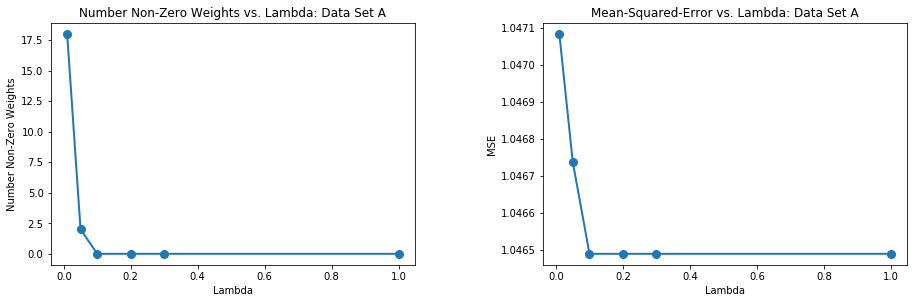

Results for Data Set B

   Lambda  Number of Non-zero Weights
0    0.01                           9
1    0.05                           7
2    0.10                           7
3    0.20                           7
4    0.30                           6
5    1.00                           5


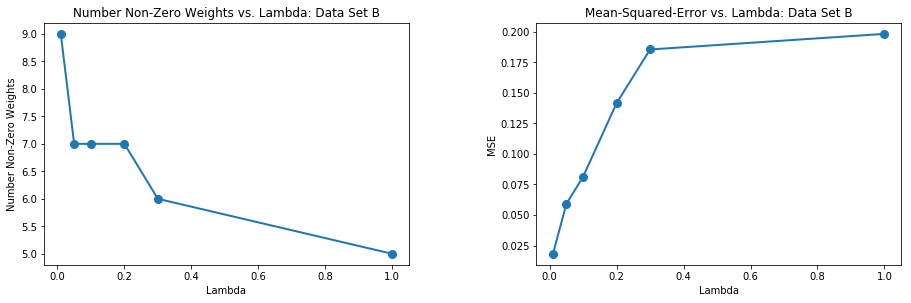

Results for Data Set C

   Lambda  Number of Non-zero Weights
0    0.01                           9
1    0.05                           8
2    0.10                           7
3    0.20                           4
4    0.30                           3
5    1.00                           2


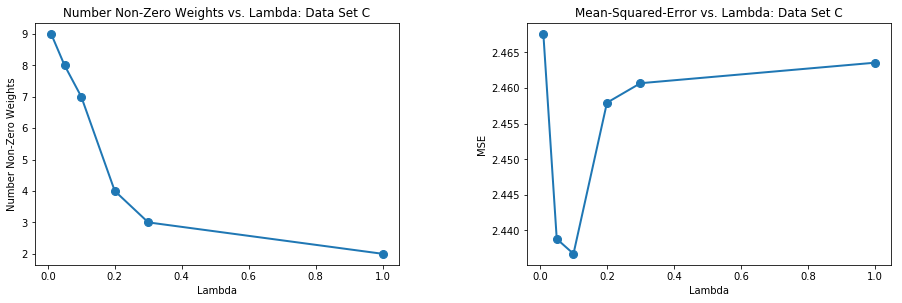

In [417]:
print("Lasso Regression: Parts A and C\n\n")
for result, data in zip(all_data_results, ["A", "B", "C"]):
    print("Results for Data Set %s\n"%data)
    report_nonzero_w = pd.DataFrame(lambdas, columns = ["Lambda"])
    report_nonzero_w["Number of Non-zero Weights"] = [x[1] for x in result]
    print(report_nonzero_w.head(6))
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.plot(lambdas, [x[1] for x in result], marker = "o",linewidth=2, markersize=8)
    plt.title("Number Non-Zero Weights vs. Lambda: Data Set %s"%data)
    plt.xlabel("Lambda")
    plt.ylabel("Number Non-Zero Weights")
    plt.subplot(122)
    plt.plot(lambdas, [x[2] for x in result], marker = "o",linewidth=2, markersize=8)
    plt.title("Mean-Squared-Error vs. Lambda: Data Set %s"%data)
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    plt.show()

In [421]:
import pandas
min_vals = []
print("Lasso Regression: Parts B and D\n\n")
for result, data in zip(all_data_results, ["A", "B", "C"]):
    min_w = np.inf
    min_w_lam = 0
    min_w_MSE = 0
    min_MSE = np.inf
    min_MSE_lam = 0
    min_MSE_w = 0
    for values, lam in zip(result, lambdas):
        if values[1] < min_w:
            min_w_lam = lam
            min_w = values[1]
            min_w_MSE = values[2]
        if values[2] < min_MSE:
            min_MSE_lam = lam
            min_MSE = values[2]
            min_MSE_w = values[1]
    wb = [data, "w_b", min_w_lam, min_w, min_w_MSE]
    wd = [data, "w_d", min_MSE_lam, min_MSE_w, min_MSE]
    min_vals.append(wb)
    min_vals.append(wd)

df = pandas.DataFrame(min_vals, columns = ["Data Set","Weights Set", "Lambda", "Num. Non-Zero Weights", "Mean-squared-error"])
df.head(6)

Lasso Regression: Parts B and D




,Data Set,Weights Set,Lambda,Num. Non-Zero Weights,Mean-squared-error
0,A,w_b,0.10,0,1.046489
1,A,w_d,0.10,0,1.046489
2,B,w_b,1.00,5,0.198332
3,B,w_d,0.01,9,0.018248
4,C,w_b,1.00,2,2.463561
5,C,w_d,0.10,7,2.436719


Lasso Regression: Part E

For data set A, all of the weights go to zero when $\lambda$ is increased to 0.10. So, yes, increasing $\lambda$ can force all of the weights to 0 for data set A

2. Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiment above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

In [450]:
def ridge_fit_predict(data, lambdas):
    results = []
    clf = linear_model.Ridge(alpha = 1)
    clf.fit(data.train_x, data.train_y)
    max_coef = np.max(np.abs(clf.coef_))
    for regParam in lambdas:
        clf = linear_model.Ridge(alpha = regParam)
        clf.fit(data.train_x, data.train_y)
        coefs = clf.coef_
        num_non_zero_w = np.sum([(x!=0) for x in coefs])
        num_basically_zero = np.sum([(np.abs(x)/max_coef > 0.01) for x in coefs])
        test_error = mean_squared_error(data.test_y, clf.predict(data.test_x))
        curr = [coefs, num_non_zero_w, test_error]
        results.append(curr)
    return results

In [194]:
all_data_results_ridge = []
lambdas_ridge = [1,50,100,200,1000]
for data in all_data:
    all_data_results_ridge.append(ridge_fit_predict(data, lambdas_ridge))

Ridge Regression: Parts A and C


Results for Data Set A

   Lambda  Number of Non-zero Weights
0       1                          20
1      50                          20
2     100                          20
3     200                          20
4    1000                          20


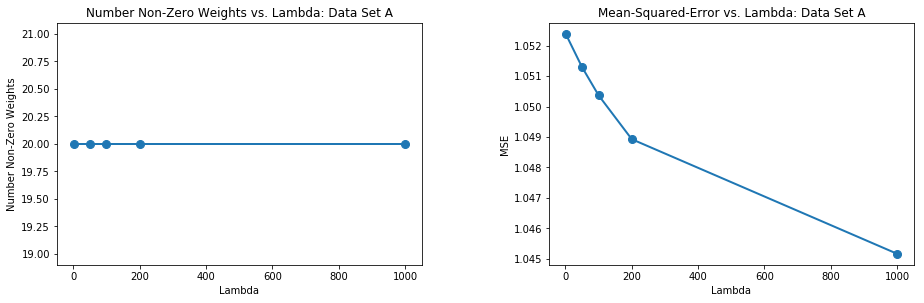

Results for Data Set B

   Lambda  Number of Non-zero Weights
0       1                           9
1      50                           9
2     100                           9
3     200                           9
4    1000                           9


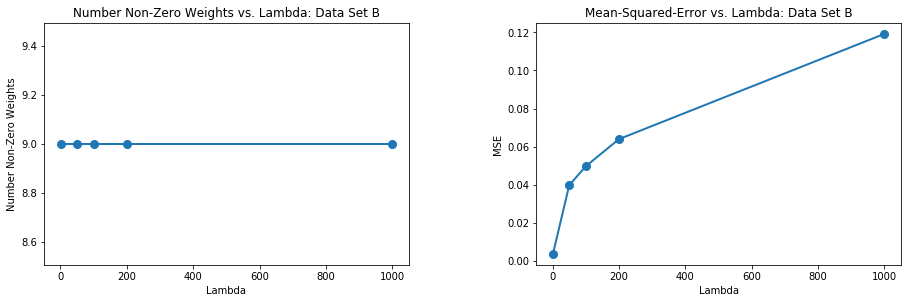

Results for Data Set C

   Lambda  Number of Non-zero Weights
0       1                          10
1      50                          10
2     100                          10
3     200                          10
4    1000                          10


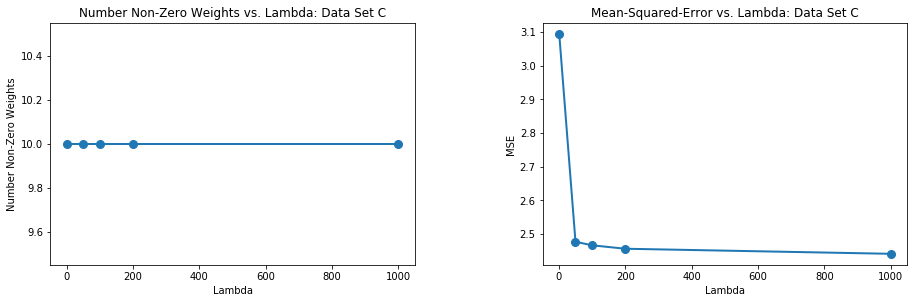

In [419]:
print("Ridge Regression: Parts A and C\n\n")
for result, data in zip(all_data_results_ridge, ["A", "B", "C"]):
    print("Results for Data Set %s\n"%data)
    report_nonzero_w = pd.DataFrame(lambdas_ridge, columns = ["Lambda"])
    report_nonzero_w["Number of Non-zero Weights"] = [x[1] for x in result]
    print(report_nonzero_w.head(6))
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.plot(lambdas_ridge, [x[1] for x in result], marker = "o",linewidth=2, markersize=8)
    plt.title("Number Non-Zero Weights vs. Lambda: Data Set %s"%data)
    plt.xlabel("Lambda")
    plt.ylabel("Number Non-Zero Weights")
    plt.subplot(122)
    plt.plot(lambdas_ridge, [x[2] for x in result], marker = "o",linewidth=2, markersize=8)
    plt.title("Mean-Squared-Error vs. Lambda: Data Set %s"%data)
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    plt.show()

Since none of the **w**'s have coefficients equal to 0, will not find the lambda that yields the smallest number of non-zero coefficients

In [422]:
min_vals_r = []
print("Ridge Regression: Parts B and D\n\n")
for result, data in zip(all_data_results_ridge, ["A", "B", "C"]):

    min_MSE = np.inf
    min_MSE_lam = 0
    min_MSE_w = 0
    for values, lam in zip(result, lambdas_ridge):

        if values[2] < min_MSE:
            min_MSE_lam = lam
            min_MSE = values[2]
            min_MSE_w = values[1]

    wd = [data, "w_d", min_MSE_lam, min_MSE_w, min_MSE]

    min_vals_r.append(wd)

df_r = pandas.DataFrame(min_vals_r, columns = ["Data Set","Weights Set", "Lambda", "Num. Non-Zero Weights", "Mean-squared-error"])
df_r.head(6)

Ridge Regression: Parts B and D




,Data Set,Weights Set,Lambda,Num. Non-Zero Weights,Mean-squared-error
0,A,w_d,1000,20,1.045160
1,B,w_d,1,9,0.003680
2,C,w_d,1000,10,2.441102


In [446]:
avg_coef = []
max_coef = []
num_non_zero = []
for lam in np.linspace(0,50000,1000):
    clf = linear_model.Ridge(alpha = lam)
    clf.fit(data_a.train_x, data_a.train_y)
    coefs = clf.coef_
    num_non_zero_w = np.sum([(x!=0) for x in coefs])
    num_non_zero.append(num_non_zero_w)
    avg_coef.append(np.average(clf.coef_))
    max_coef.append(np.max(np.abs(clf.coef_)))
    

Ridge Regression: Part E




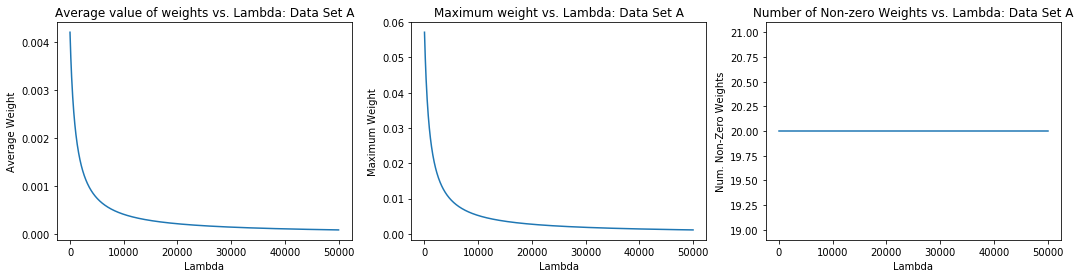

In [449]:
print("Ridge Regression: Part E\n\n")
plt.figure(figsize = (18,4))
plt.subplot(131)
plt.plot(np.linspace(0,50000,1000), avg_coef)
plt.title("Average value of weights vs. Lambda: Data Set A")
plt.xlabel("Lambda")
plt.ylabel("Average Weight")
plt.subplot(132)
plt.plot(np.linspace(0,50000,1000), max_coef)
plt.title("Maximum weight vs. Lambda: Data Set A")
plt.xlabel("Lambda")
plt.ylabel("Maximum Weight")
plt.subplot(133)
plt.plot(np.linspace(0,50000,1000), num_non_zero)
plt.title("Number of Non-zero Weights vs. Lambda: Data Set A")
plt.xlabel("Lambda")
plt.ylabel("Num. Non-Zero Weights")
plt.show()


As can be see in the plots above, although the average value of the weights and the largest absolute weight approach 0 as lambda increases, the number of non-zero weights does not decrease. The value of the weights becomes functionally 0 since they are so small but that are not actually 0. 

3. Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

$\mathbf w_b$ comparison:

The Lasso regressor does push weights to zero as lambda increases, while the Ridge regressor shrinks the weights without actually forcing them to be zero. These effects are seen for each data set. 


$\mathbf w_d$ comparison:




In [456]:
df_w_d = df.loc[df['Weights Set']=='w_d']
df_w_d_clean = df_w_d.loc[:, ["Data Set","Mean-squared-error"]]
df_w_d_r_clean = df_r.loc[:, ["Data Set","Mean-squared-error"]]
print("Lasso w_d:")
print(df_w_d_clean)
print("Ridge w_d:")
print(df_w_d_r_clean)

Lasso w_d:
  Data Set  Mean-squared-error
1        A            1.046489
3        B            0.018248
5        C            2.436719
Ridge w_d:
  Data Set  Mean-squared-error
0        A            1.045160
1        B            0.003680
2        C            2.441102


For data sets A and B the Lasso regressor has lower MSE's whereas for C the Ridge regressor has a slightly smaller MSE. Overall, the differences in the MSE are pretty small, except for data set B. For both the ridge and lasso regressors, data set B MSE worsens as lambda increases, so the features are all important and forcing weights to zero (like in the Lasso regressor) means you lose important information. 

## Kernel Perceptron - 5 points

Implement the Kernel Perceptron as described in the lecture using different kernel functions. Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

In [401]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()

In [402]:
data = Data()


**A:** Implement the kernel functions below:

In [403]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    out = np.dot(x1,x2)
    return out
    
def polynomial_kernel(x, y, p = 3):
    out = (1 + np.dot(x,y))**p
    return out 
    
def gaussian_kernel(x, y, sigma = 0.5):
    out = np.exp(-((linalg.norm(x-y))**2)/(2*sigma**2))
    return out 

**B:** Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. `Niter` is equivalent to `t` as per the lecture slides. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [408]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        
        self.kernel = kernel
        self.Niter = Niter
        self.alphas = None
        self.training_x = None
        self.training_y = None
    
    def shuffle_data(self):
        shuff = np.arange(self.training_x.shape[0])
        np.random.shuffle(shuff)
        self.training_x = self.training_x[shuff,:]
        self.training_y = self.training_y[shuff]
        self.alphas = self.alphas[shuff]
        return self.training_x, self.training_y
    

    def fit(self, X, y):
        self.alphas = np.zeros(X.shape[0])
        self.training_x = X
        self.training_y = y
        forward_back_i = list(range(min(self.Niter, len(X))))
        forward_back_i.extend(reversed(list(range(min(self.Niter, len(X))))))
        X, y = self.shuffle_data()
        for i in forward_back_i:
            summation = 0
            for j,a in enumerate(self.alphas):
                summation += a*y[j]*self.kernel(X[j],X[i])
            result = y[i]*summation
            if result <= 0:
                self.alphas[i] += 1 
    
    def predict(self, X):
        summation = 0
        y_pred = []
        for x in X:
            summation = 0
            for j,a in enumerate(self.alphas):
                summation += a*self.training_y[j]*self.kernel(self.training_x[j],x)
            y = np.sign(summation)
            y_pred.append(y)
        return np.array(y_pred)

**C:** Report the test error for each kernel function for `Niter = 20`

In [409]:
results_test = []
for k,name in zip([linear_kernel, polynomial_kernel, gaussian_kernel], ['linear_kernel', 'polynomial_kernel', 'gaussian_kernel']):
    all_test_acc = []
    all_train_acc = []
    for x in range(100):
        test = KernelPerceptron(kernel = k, Niter = 20)
        test.fit(data.X_train, data.y_train)
        y_pred = test.predict(data.X_train)
        train_acc = np.sum((y_pred == data.y_train))/len(data.y_train)
        y_pred_test = test.predict(data.X_test)
        test_acc = np.sum((y_pred_test == data.y_test))/len(data.y_test)
        all_train_acc.append(train_acc)
        all_test_acc.append(test_acc)
        
    results_test.append((name,all_test_acc))

In [411]:
for name, result in results_test:
    print("Kernel: %s"%name)
    print("Average Percent Test Error: %.2f"%(100-np.mean(result)*100))

Kernel: linear_kernel
Average Percent Test Error: 47.33
Kernel: polynomial_kernel
Average Percent Test Error: 41.47
Kernel: gaussian_kernel
Average Percent Test Error: 13.33
